<a href="https://colab.research.google.com/github/nupurgautam/nupurgautam/blob/master/Assignment_Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu==2.0.0-rc0

# Analysis on MNIST data set using Tensorflow Keras
## Implemenation details
For this implemenation Keras' sequential models are used as defined below
<table>
<tr><td>Model</td><td><b>Model 1 relu</b></td><td><b>Model 2 elu</b></td></tr>
<tr><td>Layers</td><td>Layer 1 flatten with 784 dimensions</br>
*   Layer 2 is dense with relu and 128</br>
*   Layer 3 is dense with relu and 128</br>
*   Layer 4 is dense with softmax and 10
</td><td>*   Layer 1 is flatten with 784 dimensions</br>
*   Layer 2 is dense with elu and 256</br>
*   Layer 3 is dense with softmax and 10
</td></tr>
<tr><td></td><td colspan =2 >*   Optimizer rmsprop: Divide the	learning	rate	for	a	weight by	a	running	average	of</br>	the	magnitudes	of	recent	gradients	for	that weight. This speeds up the learning
</br>* Loss: sparse_categorical_crossentropy is used as we have integer target</td></tr>
<tr><td>Model</td><td>Model: "sequential_1"</br>
Total params: 118,282</br>
Trainable params: 118,282</br>
Non-trainable params: 0</td><td>Model: "sequential_2" </br>Total params: 203,530</br>
Trainable params: 203,530</br>
Non-trainable params: 0</td></tr>
<tr><td>Recorded time of model execution (ms)</td><td>91.53710076600001</td><td>120.97846459799996</td></tr>
<tr><td>Test score</td><td>0.9753988</td><td>0.9714</td></tr>
<tr><td>Kaggle score</td><td>0.97328</td><td>0.97328</td></tr>
</table>




_________________________________________________________________

## Recorded time of model execution 
**91.53710076600001** milliseconds


## Kaggle score
Name : submission.csv
Submitted : just now
Wait time : 0 seconds
Execution time : 0 seconds
Score : ***0.97328***
Complete

## Conclusion
Given the execution time and the complexity of the implementation

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential, load_model
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

print(tf.__version__)

Using TensorFlow backend.


2.0.0-rc0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

from sklearn.model_selection import train_test_split

import seaborn as sns  # pretty plotting, including heat map

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore warning (from sklearn and seaborn)

In [0]:
scoring_data = pd.read_csv('/content/sample_data/digit_data/test_digit.csv')
train = pd.read_csv('/content/sample_data/digit_data/train_digit.csv')

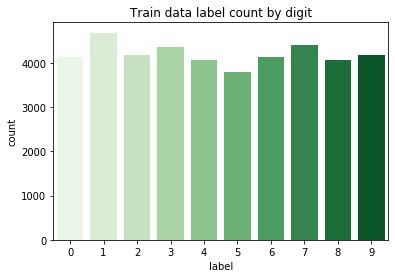

In [6]:
# Count of the all training data lables
train_count =sns.countplot(train["label"], palette="Greens").set_title('Train data label count by digit')
fig1 = train_count.get_figure()
fig1.savefig('train.png', papertype=None, format=None, transparent=True, pad_inches=0.3)

In [7]:
# data without label 
train_X = np.array(train.drop(['label'], axis=1))
# data labels 
train_y = np.array(train["label"])
print('Shape of train shape:',train.shape)
print('Shape of scoring_data shape:',scoring_data.shape)

Shape of train shape: (42000, 785)
Shape of scoring_data shape: (28000, 784)


In [10]:
train_y

array([1, 0, 1, ..., 7, 6, 9])

In [11]:
# split training set into train and test set into 70% train and 30% test
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(train.drop(['label'], axis=1), train["label"], shuffle=True,
                                                    train_size=.7, random_state=1)
# Check the shape of the trainig data set array
print('Shape of X_train_70:', X_train_70.shape)
print('Shape of y_train_70:', y_train_70.shape)
print('Shape of X_test_30:', X_test_30.shape)
print('Shape of y_test_30:', y_test_30.shape)

Shape of X_train_70: (29399, 784)
Shape of y_train_70: (29399,)
Shape of X_test_30: (12601, 784)
Shape of y_test_30: (12601,)


In [0]:
X_train_70,X_test_30 = X_train_70/255.0,X_test_30/255.0

In [0]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(784,)),
                            tf.keras.layers.Dense(128,activation='relu'),
                            tf.keras.layers.Dense(128,activation='relu'), 
                            tf.keras.layers.Dense(10,activation='softmax')])
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
model_start = time.process_time() 
model.fit(X_train_70,y_train_70,epochs=15)
model_stop = time.process_time() 


Train on 29399 samples
Epoch 1/15
29399/29399 [==============================] - 5s 160us/sample - loss: 0.1944 - accuracy: 0.9424
Epoch 2/15
29399/29399 [==============================] - 5s 167us/sample - loss: 0.1081 - accuracy: 0.9684
Epoch 3/15
29399/29399 [==============================] - 5s 164us/sample - loss: 0.0792 - accuracy: 0.9765
Epoch 4/15
29399/29399 [==============================] - 5s 172us/sample - loss: 0.0615 - accuracy: 0.9808
Epoch 5/15
29399/29399 [==============================] - 5s 171us/sample - loss: 0.0491 - accuracy: 0.9859
Epoch 6/15
29399/29399 [==============================] - 5s 167us/sample - loss: 0.0386 - accuracy: 0.9877
Epoch 7/15
29399/29399 [==============================] - 5s 168us/sample - loss: 0.0327 - accuracy: 0.9899
Epoch 8/15
29399/29399 [==============================] - 5s 165us/sample - loss: 0.0246 - accuracy: 0.9928
Epoch 9/15
29399/29399 [==============================] - 5s 157us/sample - loss: 0.0208 - accuracy: 0.9929
Epoch

In [46]:
model.evaluate(X_test_30,y_test_30)

12601/12601 [==============================] - 1s 57us/sample - loss: 0.1744 - accuracy: 0.9754


[0.17435994431039195, 0.9753988]

In [22]:
print (model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
y_scoring_data = np.argmax(model.predict(np.array(scoring_data)) , axis = 1 )

In [31]:
print("Recorded time for the execution to fit in milliseconds", model_stop- model_start) 
# Creating result data
result = pd.DataFrame()
result['Label'] = y_scoring_data
result['ImageId'] = result.index.values + 1
result = result[['ImageId','Label']]
result.head()

Recorded time for the execution to fit in milliseconds 91.53710076600001


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [0]:
result.to_csv('submission.csv',index=False)


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
model_elu_256 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(784,)),
                            tf.keras.layers.Dense(256,activation='elu'),
                            tf.keras.layers.Dense(10,activation='softmax')])
model_elu_256.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [48]:
model_elu_256_start = time.process_time() 
model_elu_256.fit(X_train_70,y_train_70,epochs=15)
model_elu_256_stop = time.process_time() 
model_elu_256.evaluate(X_test_30,y_test_30)
print (model_elu_256.summary())

Train on 29399 samples
Epoch 1/15
29399/29399 [==============================] - 6s 197us/sample - loss: 0.3553 - accuracy: 0.8959
Epoch 2/15
29399/29399 [==============================] - 6s 190us/sample - loss: 0.1955 - accuracy: 0.9420
Epoch 3/15
29399/29399 [==============================] - 6s 190us/sample - loss: 0.1348 - accuracy: 0.9606
Epoch 4/15
29399/29399 [==============================] - 6s 190us/sample - loss: 0.1031 - accuracy: 0.9689
Epoch 5/15
29399/29399 [==============================] - 5s 187us/sample - loss: 0.0831 - accuracy: 0.9755
Epoch 6/15
29399/29399 [==============================] - 5s 180us/sample - loss: 0.0683 - accuracy: 0.9792
Epoch 7/15
29399/29399 [==============================] - 6s 204us/sample - loss: 0.0575 - accuracy: 0.9820
Epoch 8/15
29399/29399 [==============================] - 5s 184us/sample - loss: 0.0495 - accuracy: 0.9853
Epoch 9/15
29399/29399 [==============================] - 5s 187us/sample - loss: 0.0419 - accuracy: 0.9878
Epoch

In [49]:
y_scoring_data_2 = np.argmax(model_elu_256.predict(np.array(scoring_data)) , axis = 1 )
print("Recorded time for the execution to fit in milliseconds", model_relu_256_stop - model_relu_256_start) 
# Creating result data
result2 = pd.DataFrame()
result2['Label'] = y_scoring_data_2
result2['ImageId'] = result2.index.values + 1
result2 = result2[['ImageId','Label']]
result2.head()
result.to_csv('submission_2.csv',index=False)

Recorded time for the execution to fit in milliseconds 120.97846459799996
